In [9]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable


Loaded: /users/htasnim/simreef/simreef_outputs/simreef_array_4106796/01/results/population_stats/population_summary.csv
Loaded: /users/htasnim/simreef/simreef_outputs/simreef_array_4106796/02/results/population_stats/population_summary.csv
Loaded: /users/htasnim/simreef/simreef_outputs/simreef_array_4106796/03/results/population_stats/population_summary.csv
Loaded: /users/htasnim/simreef/simreef_outputs/simreef_array_4106796/04/results/population_stats/population_summary.csv
Loaded: /users/htasnim/simreef/simreef_outputs/simreef_array_4106796/05/results/population_stats/population_summary.csv
Loaded: /users/htasnim/simreef/simreef_outputs/simreef_array_4106796/06/results/population_stats/population_summary.csv
Loaded: /users/htasnim/simreef/simreef_outputs/simreef_array_4106796/07/results/population_stats/population_summary.csv
Loaded: /users/htasnim/simreef/simreef_outputs/simreef_array_4106796/08/results/population_stats/population_summary.csv
Loaded: /users/htasnim/simreef/simreef_o

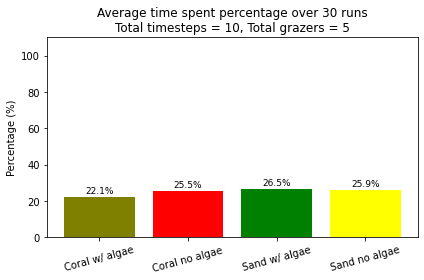

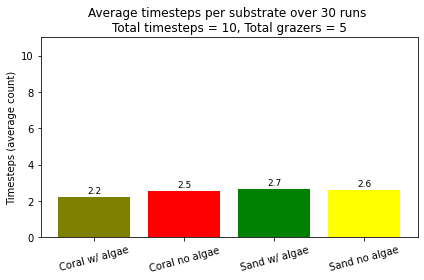


Saved aggregated summary to: /users/htasnim/simreef/simreef_outputs/simreef_array_4106796/population_summary_avg_aggregated.csv


In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# === Settings ===
# Folder that contains subfolders "01", "02", ... each with results\population_stats\population_summary.csv
#base_dir = r"/users/htasnim/simreef/simreef_outputs/simreef_array_4106459"
# paste path for the runs 
base_dir = os.path.expanduser("~/simreef/simreef_outputs/simreef_array_4106796")

# Relative path from each run folder to the population_summary.csv
relative_csv_path = os.path.join("results", "population_stats", "population_summary.csv")

output_prefix = "population_summary_avg"  # base name for saved average figures

# === Columns & labels ===
percent_labels = [
    "Coral w/ algae",
    "Coral no algae",
    "Sand w/ algae",
    "Sand no algae",
]

percent_columns = [
    "coral_w_algae_percent",
    "coral_no_algae_percent",
    "sand_w_algae_percent",
    "sand_no_algae_percent",
]

timestep_labels = percent_labels  # same order
timestep_columns = [
    "coral_w_algae_timesteps",
    "coral_no_algae_timesteps",
    "sand_w_algae_timesteps",
    "sand_no_algae_timesteps",
]

colors = ["olive", "red", "green", "yellow"]

# === Collect rows from all runs ===
rows = []

for entry in sorted(os.listdir(base_dir)):
    run_dir = os.path.join(base_dir, entry)
    if not os.path.isdir(run_dir):
        continue

    # If you want to restrict to numeric folder names like "01", "02", uncomment:
    # if not entry.isdigit():
    #     continue

    csv_path = os.path.join(run_dir, relative_csv_path)

    if os.path.exists(csv_path):
        try:
            df = pd.read_csv(csv_path)
            if not df.empty:
                rows.append(df.iloc[0])
                print(f"Loaded: {csv_path}")
            else:
                print(f"WARNING: {csv_path} is empty.")
        except Exception as e:
            print(f"ERROR reading {csv_path}: {e}")
    else:
        print(f"Missing: {csv_path}")

if not rows:
    raise RuntimeError("No population_summary.csv files found. Check base_dir and paths.")

# Combine into a single DataFrame
summary_df = pd.DataFrame(rows)

total_timesteps_value = summary_df["total_timesteps"].iloc[0]
grazer_count_value = summary_df["grazer_count"].iloc[0]

print(f"\nNumber of runs aggregated: {len(summary_df)}")

# === Compute averages ===
avg_percent_values = summary_df[percent_columns].mean()
avg_timestep_values = summary_df[timestep_columns].mean()

# === Plot 1: Average Percentages ===
plt.figure(figsize=(6, 4))
x = range(len(percent_labels))
y_percent = [avg_percent_values[col] for col in percent_columns]

plt.bar(x, y_percent, color=colors)
plt.xticks(x, percent_labels, rotation=15)
plt.ylabel("Percentage (%)")
plt.title(
    f"Average time spent percentage over {len(summary_df)} runs\n"
    f"Total timesteps = {int(total_timesteps_value)}, Total grazers = {int(grazer_count_value)}"
)
# plt.title("Average time spent percentage in each substrate (over "+ str(len(summary_df)) +" runs) \n Total Timestep = ")
plt.ylim(0, 110)  # assuming percentages

for xi, val in zip(x, y_percent):
    plt.text(xi, val + 1, f"{val:.1f}%", ha="center", va="bottom", fontsize=9)

plt.tight_layout()
plt.savefig(os.path.join(base_dir,f"{output_prefix}_percentages.png"), dpi=300)
plt.show()

# === Plot 2: Average Timesteps Counts ===
plt.figure(figsize=(6, 4))
y_steps = [avg_timestep_values[col] for col in timestep_columns]

plt.bar(x, y_steps, color=colors)
plt.xticks(x, timestep_labels, rotation=15)
plt.ylim(0.0, total_timesteps_value + 1)
plt.ylabel("Timesteps (average count)")
# plt.title("Average number of timesteps in each substrate (over "+ str(len(summary_df)) +" runs)")
plt.title(
    f"Average timesteps per substrate over {len(summary_df)} runs \n"
    f"Total timesteps = {int(total_timesteps_value)}, Total grazers = {int(grazer_count_value)}"
)

for xi, val in zip(x, y_steps):
    plt.text(xi, val + 0.05 * max(y_steps, default=1),
             f"{val:.1f}", ha="center", va="bottom", fontsize=9)

plt.tight_layout()
plt.savefig(os.path.join(base_dir,f"{output_prefix}_timesteps.png"), dpi=300)
plt.show()

summary_output_path = os.path.join(base_dir, f"{output_prefix}_aggregated.csv")
summary_df.to_csv(summary_output_path, index=False)
print(f"\nSaved aggregated summary to: {summary_output_path}")
